# Multi-Channel Recording
This notebook allows recording of multiple channels at the same time. This only works with **1 MCC172 hat** at the moment. 

## Import required modules

In [15]:
%matplotlib widget

In [16]:
from __future__ import print_function
import pydaqhat as py
import soundfile as sf
from mutagen.flac import FLAC
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Finite scan

In [36]:
channels = [0,1] # Channels to use
iepe_enable = False # Enable/disable IEPE
sensitivity = 1000 # Sensitivity in mV/unit
sample_rate = 5000 # Number of samples per second
recording_length = 1 # Length of recording in seconds
unit = ("Voltage", "V") # Unit of measurement. Format is (unit_name, unit_unit)

data = py.finite_scan(
    channels=channels, 
    iepe_enable=iepe_enable, 
    sensitivity=sensitivity, 
    sample_rate=sample_rate, 
    recording_length=recording_length
)

Found a board at address: 0
Recording will start with parameters
                Channels: [0, 1]
                IEPE: False
                Requested Scan Rate: 5000 Hz
                Actual Scan Rate: 5120.000 Hz
                Length of Recording: 1 seconds
                Sensitivity: 1000 mV/unit
                Option Flags: DEFAULT
                
Starting scan...
Recording finished with 10000 samples


## Save to FLAC

In [34]:
filename = "data/multichannel_recording"
hat = py.get_hat()
actual_sample_rate = round(hat.a_in_scan_actual_rate(sample_rate))

last_start_index = 0
for i in range(len(channels)):
    end_index = last_start_index+len(data.data)//len(channels)
    new_filename = "{}_{}.flac".format(filename, str(i))

    sf.write(new_filename, data.data[last_start_index:end_index], actual_sample_rate)

    last_start_index = end_index 
    
    file = FLAC(new_filename)
    file["Title"] = "Finite Recording"
    file["Channels Used"] = str(channels)
    file["IEPE Enable"] = str(iepe_enable)
    file["Sensitivity"] = str(sensitivity)
    file["Sample Rate"] = str(actual_sample_rate )
    file["Unit"] = "{} ({})".format(unit[0], unit[1])
    
    file.save()
    

print("{} recordings saved to {}".format(len(channels), filename))

2 recordings saved to data/multichannel_recording


## Plot multiple channels

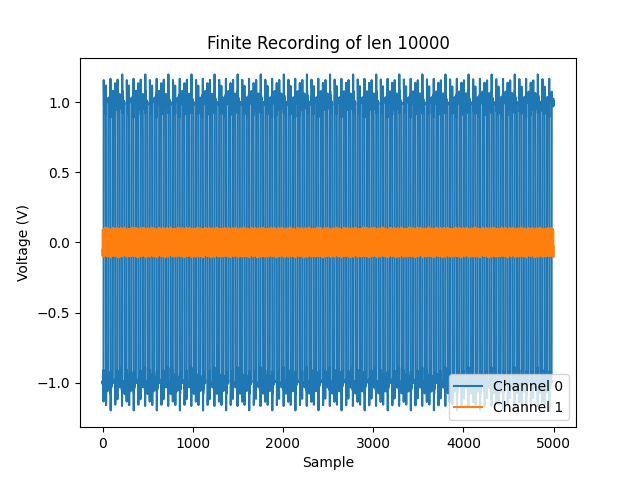

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.set_ylabel("{} ({})".format(unit[0], unit[1]))
ax1.set_xlabel("Sample")
ax1.set_title("Finite Recording of len {}".format(len(data.data)))


legend = []
last_start_index = 0
for i in range(len(channels)):
    end_index = last_start_index+len(data.data)//len(channels)
    ax1.plot(data.data[i::2])
    last_start_index = end_index
    legend.append("Channel {}".format(channels[i]))

ax1.legend(legend)